kgmyh@naver.com 으로 `이름_주유소가격 데이터 분석.html` 로 제출
- html 파일로 변환
    - File > Download as > HTML (.html) 선택

# 데이터 불러오기

- 2022년 주유소들의 일자별 가격 데이터
- https://www.opinet.co.kr/user/opdown/opDownload.do

----

- **상반기, 하반기 주유소 가격 데이터 조회**

In [1]:
import pandas as pd

df1 = pd.read_csv('data/2022년_서울_상반기_일별_가격.csv', encoding='euc-kr')
df2 = pd.read_csv('data/2022년_서울_하반기_일별_가격.csv', encoding='euc-kr')

In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82689 entries, 0 to 82688
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      82689 non-null  object
 1   지역      82689 non-null  object
 2   상호      82689 non-null  object
 3   주소      82689 non-null  object
 4   기간      82689 non-null  int64 
 5   상표      82689 non-null  object
 6   셀프여부    82689 non-null  object
 7   고급휘발유   82689 non-null  int64 
 8   휘발유     82689 non-null  int64 
 9   경유      82689 non-null  int64 
 10  실내등유    82689 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 6.9+ MB


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81793 entries, 0 to 81792
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      81793 non-null  object
 1   지역      81793 non-null  object
 2   상호      81793 non-null  object
 3   주소      81793 non-null  object
 4   기간      81793 non-null  int64 
 5   상표      81793 non-null  object
 6   셀프여부    81793 non-null  object
 7   고급휘발유   81793 non-null  int64 
 8   휘발유     81793 non-null  int64 
 9   경유      81793 non-null  int64 
 10  실내등유    81793 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 6.9+ MB


----

- **상반기, 하반기 DataFrame 합치기**

In [4]:
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0


-------

-  **DataFrame 기본 정보 조회**
    - df.info()-> null 값 & 타입 확인 & 범주형 확인
    -  df.head()/df.tail()-> 값 예시 확인
    -  df.isnull().sum -> 결측치 체크)
    -  df.describe() # 정수/ 실수 타입 컬럼
    -  df.describe(include='object') # 문자열(object)타입 컬럼

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164482 entries, 0 to 164481
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      164482 non-null  object
 1   지역      164482 non-null  object
 2   상호      164482 non-null  object
 3   주소      164482 non-null  object
 4   기간      164482 non-null  int64 
 5   상표      164482 non-null  object
 6   셀프여부    164482 non-null  object
 7   고급휘발유   164482 non-null  int64 
 8   휘발유     164482 non-null  int64 
 9   경유      164482 non-null  int64 
 10  실내등유    164482 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 13.8+ MB


In [6]:
df.describe()  # 정수/실수 타입 컬럼

,기간,고급휘발유,휘발유,경유,실내등유
count,1.644820e+05,164482.000000,164482.000000,164482.000000,164482.000000
mean,2.022066e+07,1083.639146,1877.600838,1907.360337,538.948444
std,3.456995e+02,1085.018886,243.317021,237.067045,761.401689
min,2.022010e+07,0.000000,0.000000,0.000000,0.000000
25%,2.022033e+07,0.000000,1690.000000,1817.000000,0.000000
50%,2.022063e+07,1760.000000,1855.000000,1899.000000,0.000000
75%,2.022093e+07,2130.000000,2030.000000,2018.000000,1451.000000
max,2.022123e+07,3496.000000,3096.000000,3230.000000,2719.000000


In [7]:
df.describe(include='object') # 문자열(object)

,번호,지역,상호,주소,상표,셀프여부
count,164482,164482,164482,164482,164482,164482
unique,469,25,464,469,7,2
top,A0006039,서울 강남구,대성주유소,서울 강남구 논현로 640,SK에너지,셀프
freq,365,12278,730,365,48267,92478


-----

- **상표 컬럼의 고유값 조회**
    - df.unique(): 고유값 조회
    - df.value_counts(): 고유값 개수 조회
    - df.value_counts(normalize=True): 고유값 비율 조회

In [8]:
df['상표'].unique()

array(['SK에너지', 'GS칼텍스', '현대오일뱅크', 'S-OIL', '알뜰주유소', '자가상표', '알뜰(ex)'],
      dtype=object)

In [9]:
df['상표'].value_counts()

SK에너지     48267
현대오일뱅크    42351
GS칼텍스     40449
S-OIL     28762
알뜰주유소      3551
자가상표        737
알뜰(ex)      365
Name: 상표, dtype: int64

In [10]:
df['상표'].value_counts(normalize=True)

SK에너지     0.293449
현대오일뱅크    0.257481
GS칼텍스     0.245917
S-OIL     0.174864
알뜰주유소     0.021589
자가상표      0.004481
알뜰(ex)    0.002219
Name: 상표, dtype: float64

-------

- **지역 컬럼의 고유값 조회**

In [11]:
df['지역'].unique()

array(['서울 강남구', '서울 강동구', '서울 강북구', '서울 강서구', '서울 관악구', '서울 광진구',
       '서울 구로구', '서울 금천구', '서울 노원구', '서울 도봉구', '서울 동대문구', '서울 동작구',
       '서울 마포구', '서울 서대문구', '서울 서초구', '서울 성동구', '서울 성북구', '서울 송파구',
       '서울 양천구', '서울 영등포구', '서울 용산구', '서울 은평구', '서울 종로구', '서울 중구',
       '서울 중랑구'], dtype=object)

In [12]:
df['지역'].value_counts()

서울 강남구     12278
서울 강서구     11825
서울 송파구     11295
서울 서초구     11231
서울 영등포구     9814
서울 양천구      9015
서울 성북구      8522
서울 구로구      7384
서울 동대문구     6574
서울 성동구      6006
서울 도봉구      5992
서울 은평구      5807
서울 노원구      5474
서울 서대문구     5472
서울 강동구      5110
서울 광진구      5107
서울 관악구      5104
서울 중랑구      4873
서울 용산구      4637
서울 강북구      4460
서울 마포구      4375
서울 금천구      4067
서울 중구       3643
서울 동작구      3436
서울 종로구      2981
Name: 지역, dtype: int64

In [13]:
df['지역'].value_counts(normalize=True)

서울 강남구     0.074646
서울 강서구     0.071892
서울 송파구     0.068670
서울 서초구     0.068281
서울 영등포구    0.059666
서울 양천구     0.054808
서울 성북구     0.051811
서울 구로구     0.044892
서울 동대문구    0.039968
서울 성동구     0.036515
서울 도봉구     0.036430
서울 은평구     0.035305
서울 노원구     0.033280
서울 서대문구    0.033268
서울 강동구     0.031067
서울 광진구     0.031049
서울 관악구     0.031031
서울 중랑구     0.029626
서울 용산구     0.028192
서울 강북구     0.027115
서울 마포구     0.026599
서울 금천구     0.024726
서울 중구      0.022148
서울 동작구     0.020890
서울 종로구     0.018124
Name: 지역, dtype: float64

-------

> ### str accessor
> - `Series.str.String메소드()`
> - 문자열 타입 Series에 String 메소드들을 사용하여 일괄처리 할 수 있도록 한다.
> - str accessor 메소드 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-str

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series, format="날짜형식")`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - format: 년월일의 형식을 strftime 형식문자열로 지정한다. 
>      - [strftime 형식](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)  
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html


---------

- **지역 컬럼의 값을 이용하여 "구" 컬럼 생성 (지역에서 구만 추출해서 파생변수컬럼 생성)**

In [14]:
print('서울 강남구'.split()[1])
# '서울 강남구'.slice(3) => str accessor 이용
print('서울 강남구'[3:])

강남구
강남구


In [15]:
# df['구'] = df['지역'].apply(lambda x : x.split()[1])
df['구'] = df.지역.str.split(' ').str[1]
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0,강남구
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0,강남구
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0,강남구
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0,강남구
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0,강남구


------

- **기간 컬럼을 datetime 타입으로 변경**

In [16]:
df['기간'] = pd.to_datetime(df['기간'], format='%Y%m%d') # Y:년, m:월(2자리), d:일, H:시간, M:분, S:초
df['기간']

0        2022-01-01
1        2022-01-02
2        2022-01-03
3        2022-01-04
4        2022-01-05
            ...    
164477   2022-12-27
164478   2022-12-28
164479   2022-12-29
164480   2022-12-30
164481   2022-12-31
Name: 기간, Length: 164482, dtype: datetime64[ns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164482 entries, 0 to 164481
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   번호      164482 non-null  object        
 1   지역      164482 non-null  object        
 2   상호      164482 non-null  object        
 3   주소      164482 non-null  object        
 4   기간      164482 non-null  datetime64[ns]
 5   상표      164482 non-null  object        
 6   셀프여부    164482 non-null  object        
 7   고급휘발유   164482 non-null  int64         
 8   휘발유     164482 non-null  int64         
 9   경유      164482 non-null  int64         
 10  실내등유    164482 non-null  int64         
 11  구       164482 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 15.1+ MB


------

- **기간 컬럼을 이용해 "월", "일", "요일" 컬럼 생성 (dt accessor 이용)**

In [18]:
from datetime import datetime

df['월'] = df['기간'].dt.month
df['일'] = df['기간'].dt.day
df['요일'] = df['기간'].dt.weekday
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,5
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,6
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,1
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164482 entries, 0 to 164481
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   번호      164482 non-null  object        
 1   지역      164482 non-null  object        
 2   상호      164482 non-null  object        
 3   주소      164482 non-null  object        
 4   기간      164482 non-null  datetime64[ns]
 5   상표      164482 non-null  object        
 6   셀프여부    164482 non-null  object        
 7   고급휘발유   164482 non-null  int64         
 8   휘발유     164482 non-null  int64         
 9   경유      164482 non-null  int64         
 10  실내등유    164482 non-null  int64         
 11  구       164482 non-null  object        
 12  월       164482 non-null  int64         
 13  일       164482 non-null  int64         
 14  요일      164482 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(7)
memory usage: 18.8+ MB


------

- **요일 - 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일 로 변경**

In [20]:
def cw(num_x):
    if num_x == 0:
        return "월"
    elif num_x == 1:
        return "화"
    ...
cw(1)

'화'

In [21]:
"월화수목금토일"[6]

'일'

In [22]:
df['요일']=df['요일'].apply(lambda x : '월화수목금토일'[x])

In [23]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,토
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,일
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,월
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,화
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,수


------

- **전처리 완료 -> 파일로 저장**

In [24]:
df.to_csv('data/2022년_주유소_가격_데이터_preprocessing.csv', index=False)

In [25]:
df2 = pd.read_csv('data/2022년_주유소_가격_데이터_preprocessing.csv')
df2.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,토
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,일
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,월
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,화
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,수


---------

- **휘발유 가격이 가장 비싼 5개 행 조회**

In [26]:
df.sort_values('휘발유', ascending=False).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-22,SK에너지,일반,3496,3096,3223,2719,중구,6,22,수
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,6,26,일
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,6,24,금
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-23,SK에너지,일반,3496,3096,3223,2719,중구,6,23,목
78940,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-27,SK에너지,일반,3496,3096,3223,2719,중구,6,27,월


In [27]:
df.sort_values(['휘발유', '기간'], ascending=[False, True]).head() # 날짜별 정렬

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-22,SK에너지,일반,3496,3096,3223,2719,중구,6,22,수
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-23,SK에너지,일반,3496,3096,3223,2719,중구,6,23,목
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,6,24,금
78938,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-25,SK에너지,일반,3496,3096,3223,2719,중구,6,25,토
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,6,26,일


------

- **휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)**

In [28]:
df[df['휘발유'] != 0].sort_values('휘발유').head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
99498,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-12-27,알뜰주유소,셀프,0,1410,1660,0,강서구,12,27,화
97839,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-24,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,24,토
97840,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-25,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,25,일
148433,A0001005,서울 양천구,현대주유소,서울 양천구 남부순환로 372 (신월동),2022-12-26,S-OIL,셀프,0,1410,1660,0,양천구,12,26,월
97838,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-23,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,23,금


In [29]:
df.query('휘발유 != 0').sort_values('휘발유').head() # query사용

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
99498,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-12-27,알뜰주유소,셀프,0,1410,1660,0,강서구,12,27,화
97839,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-24,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,24,토
97840,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-25,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,25,일
148433,A0001005,서울 양천구,현대주유소,서울 양천구 남부순환로 372 (신월동),2022-12-26,S-OIL,셀프,0,1410,1660,0,양천구,12,26,월
97838,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-23,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,23,금


In [30]:
df[df['휘발유'] != 0].sort_values(['휘발유', '기간']).head() # 날짜별 정렬

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
97838,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-23,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,23,금
99494,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-12-23,알뜰주유소,셀프,0,1410,1660,0,강서구,12,23,금
97839,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-24,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,24,토
99495,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-12-24,알뜰주유소,셀프,0,1410,1660,0,강서구,12,24,토
148431,A0001005,서울 양천구,현대주유소,서울 양천구 남부순환로 372 (신월동),2022-12-24,S-OIL,셀프,0,1410,1660,0,양천구,12,24,토


------

- **고급휘발유 가격이 가장 비싼 5개 행 조회**

In [31]:
df.sort_values(['고급휘발유', '기간'], ascending=[False, True]).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-22,SK에너지,일반,3496,3096,3223,2719,중구,6,22,수
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-23,SK에너지,일반,3496,3096,3223,2719,중구,6,23,목
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,6,24,금
78938,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-25,SK에너지,일반,3496,3096,3223,2719,중구,6,25,토
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,6,26,일


------

- **고급휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)**

In [32]:
df.query('고급휘발유 != 0').sort_values(['고급휘발유', '기간']).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
98570,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-19,S-OIL,셀프,1599,1527,1787,0,강서구,12,19,월
98571,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-20,S-OIL,셀프,1599,1527,1787,0,강서구,12,20,화
98572,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-21,S-OIL,셀프,1599,1499,1759,0,강서구,12,21,수
98573,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-22,S-OIL,셀프,1599,1499,1759,0,강서구,12,22,목
98574,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-23,S-OIL,셀프,1599,1499,1729,0,강서구,12,23,금


------

- **경유 가격이 가장 비싼 5개 행 조회**

In [33]:
df.sort_values(['경유', '기간'], ascending=[False, True]).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78941,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-28,SK에너지,일반,3481,3081,3230,2703,중구,6,28,화
78942,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-29,SK에너지,일반,3481,3081,3230,2703,중구,6,29,수
78943,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-30,SK에너지,일반,3481,3081,3230,2703,중구,6,30,목
160618,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-07-01,SK에너지,일반,3481,3081,3230,2703,중구,7,1,금
160619,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-07-02,SK에너지,일반,3481,3081,3230,2703,중구,7,2,토


------

- **경유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)**

In [34]:
df.query('경유 != 0').sort_values(['경유', '기간']).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
45209,A0011826,서울 서초구,만남의광장주유소,서울 서초구 양재대로12길 73-71,2022-01-16,알뜰(ex),셀프,0,1565,1367,0,서초구,1,16,일
23999,A0000855,서울 구로구,대원셀프주유소,서울 구로구 개봉로 7,2022-01-01,현대오일뱅크,셀프,0,1577,1377,0,구로구,1,1,토
24000,A0000855,서울 구로구,대원셀프주유소,서울 구로구 개봉로 7,2022-01-02,현대오일뱅크,셀프,0,1577,1377,0,구로구,1,2,일
24001,A0000855,서울 구로구,대원셀프주유소,서울 구로구 개봉로 7,2022-01-03,현대오일뱅크,셀프,0,1577,1377,0,구로구,1,3,월
24002,A0000855,서울 구로구,대원셀프주유소,서울 구로구 개봉로 7,2022-01-04,현대오일뱅크,셀프,0,1577,1377,0,구로구,1,4,화


------

- **상표별 휘발유 평균가격 조회**

In [35]:
상표별_휘발유_평균가격=df.groupby('상표')['휘발유'].mean().sort_values()
상표별_휘발유_평균가격

상표
알뜰(ex)    1759.884932
알뜰주유소     1767.914672
자가상표      1823.622795
현대오일뱅크    1839.447215
S-OIL     1859.282595
GS칼텍스     1904.899429
SK에너지     1908.900823
Name: 휘발유, dtype: float64

In [36]:
상표별_휘발유_평균가격=df.query("휘발유 != 0").groupby('상표')['휘발유'].mean().sort_values()  # 0을 뺐을 때
상표별_휘발유_평균가격

상표
알뜰(ex)    1759.884932
알뜰주유소     1769.908373
자가상표      1838.590971
현대오일뱅크    1846.510441
S-OIL     1859.541206
GS칼텍스     1908.343496
SK에너지     1910.959577
Name: 휘발유, dtype: float64

------

- **상표별 휘발유 평균가격 시각화**  + 전체 평균 표시

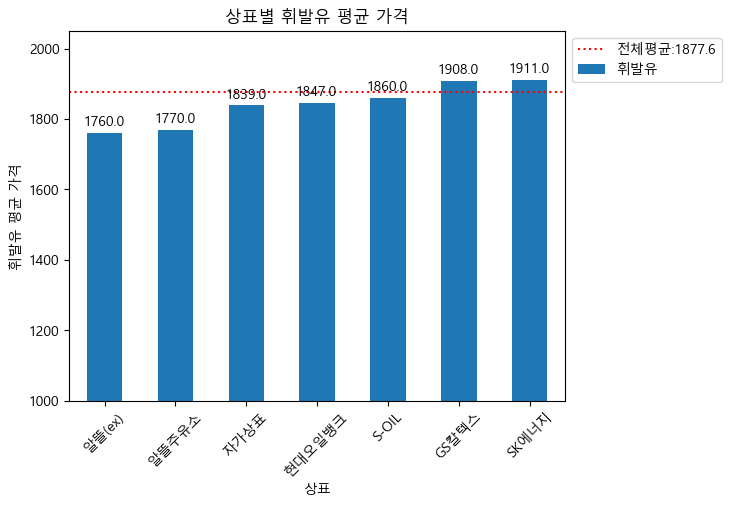

In [37]:
import matplotlib.pyplot as plt
휘발유_전체_평균 = np.round(df['휘발유'].mean(), 2)

상표별_휘발유_평균가격.plot(kind='bar', title='상표별 휘발유 평균 가격', xlabel='상표', ylabel='휘발유 평균 가격', rot=45)
plt.axhline(휘발유_전체_평균, color='red', linestyle=':', label=f'전체평균:{휘발유_전체_평균}')

for i in range(상표별_휘발유_평균가격.size):      # 상표별 휘발유 평균 가격 표시
    txt = str(np.round(상표별_휘발유_평균가격[i]))
    plt.text(i-0.3, 상표별_휘발유_평균가격[i]+20, txt)

plt.ylim(1000, 2050)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

------

- **셀프주유소와 일반주유소 개수 확인**

In [38]:
df['셀프여부'].value_counts()

셀프    92478
일반    72004
Name: 셀프여부, dtype: int64

In [43]:
df['셀프여부'].value_counts(normalize=True)

셀프    0.562238
일반    0.437762
Name: 셀프여부, dtype: float64

------

- **셀프 여부에 따른 휘발유 평균 가격 비교**

In [44]:
df.groupby('셀프여부')['휘발유'].mean()

셀프여부
셀프    1818.216376
일반    1953.870993
Name: 휘발유, dtype: float64

In [45]:
df.query("휘발유 != 0").groupby('셀프여부')['휘발유'].mean()

셀프여부
셀프    1820.637908
일반    1958.713098
Name: 휘발유, dtype: float64

------

- **상표별 일반/셀프 주유소의 휘발유 가격 평균 비교**

In [53]:
df_mean2 = df.pivot_table(index='상표', columns='셀프여부', values='휘발유', aggfunc='mean')# margins=True 전체 평균을 보고 싶을때
df_mean2

셀프여부,셀프,일반
상표,,
GS칼텍스,1825.849350,2001.420217
S-OIL,1820.122748,1932.115939
SK에너지,1826.717027,2003.229520
알뜰(ex),1759.884932,NaN
알뜰주유소,1754.261378,1796.201557
자가상표,2017.000000,1821.768493
현대오일뱅크,1807.265898,1877.606059


In [54]:
df.groupby(['상표', '셀프여부'])['휘발유'].mean().to_frame()

휘발유
상표     셀프여부             
GS칼텍스  셀프    1825.849350
       일반    2001.420217
S-OIL  셀프    1820.122748
       일반    1932.115939
SK에너지  셀프    1826.717027
       일반    2003.229520
알뜰(ex) 셀프    1759.884932
알뜰주유소  셀프    1754.261378
       일반    1796.201557
자가상표   셀프    2017.000000
       일반    1821.768493
현대오일뱅크 셀프    1807.265898
       일반    1877.606059

In [60]:
df.groupby(['상표', '셀프여부'])['휘발유'].mean().unstack(level=0)  # level=0 상표와 셀프여부의 축 위치가 바뀐다.  -> 그냥 pivot table을 이용하면 된다.

상표,GS칼텍스,S-OIL,SK에너지,알뜰(ex),알뜰주유소,자가상표,현대오일뱅크
셀프여부,,,,,,,
셀프,1825.849350,1820.122748,1826.717027,1759.884932,1754.261378,2017.000000,1807.265898
일반,2001.420217,1932.115939,2003.229520,NaN,1796.201557,1821.768493,1877.606059


------

- **상표별 일반/셀프 주유소의 휘발유 가격 평균 비교 시각화**

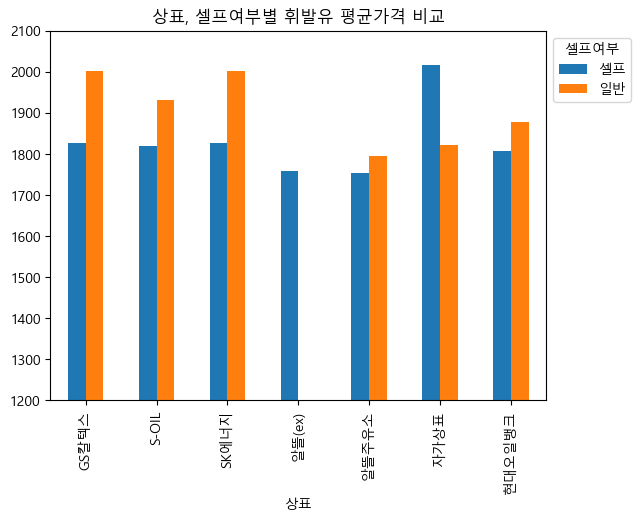

In [64]:
df_mean2.plot(kind='bar', ylim=(1200, 2100), title='상표, 셀프여부별 휘발유 평균가격 비교')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='셀프여부')
plt.show()

------

- **휘발유 가격의 분포를 boxplot으로 시각화**

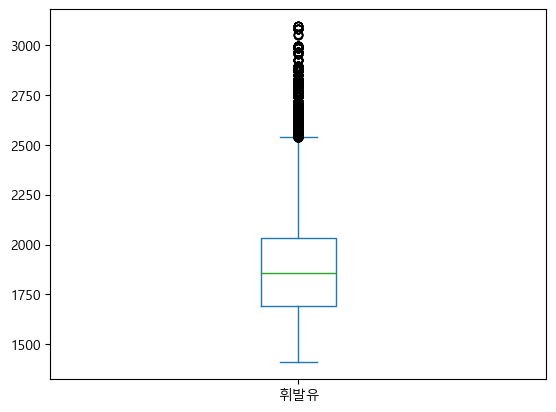

In [67]:
df.query("휘발유!=0")['휘발유'].plot(kind='box')
plt.show()

------

- **상표별 휘발유 가격의 분포를 boxplot으로 시각화**

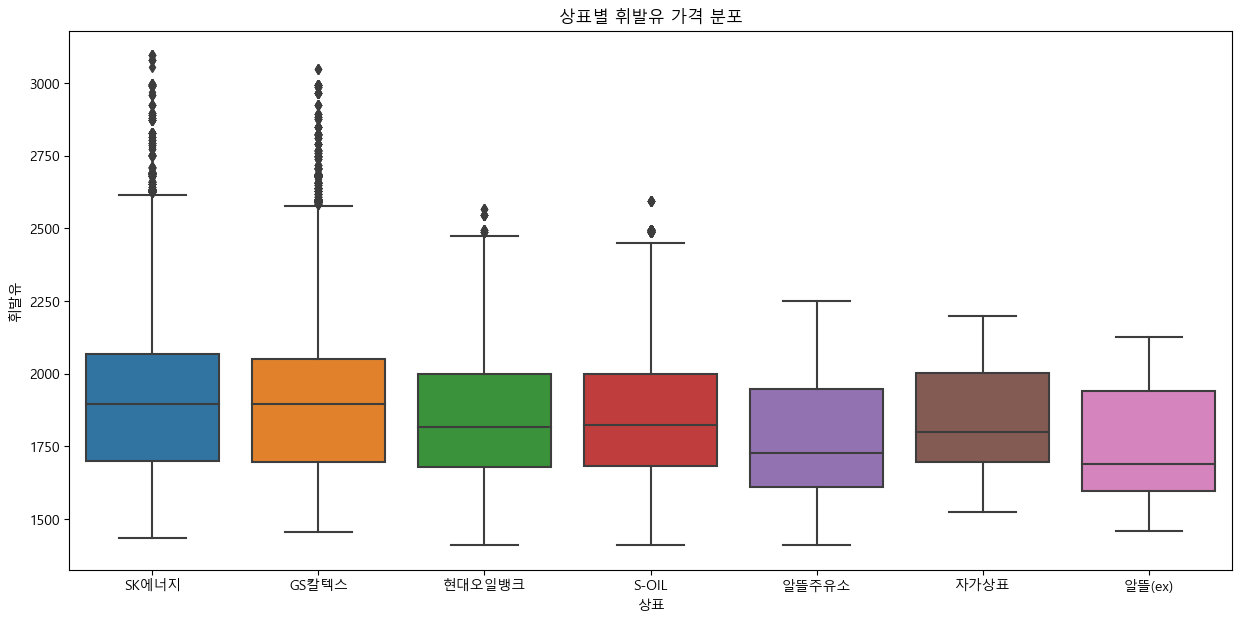

In [72]:
import seaborn as sns
plt.figure(figsize = (15, 7))
sns.boxplot(data=df.query('휘발유!=0'), x='상표', y='휘발유')  #  y: 연속형 -> 4분위, 정상범위 등을 계산, x: 범주형-나누는 대상
plt.title('상표별 휘발유 가격 분포')
plt.show()

------

- **상표별 일반/셀프 주유소의 휘발유 가격에 대한 분포 확인 - boxplot으로 시각화**

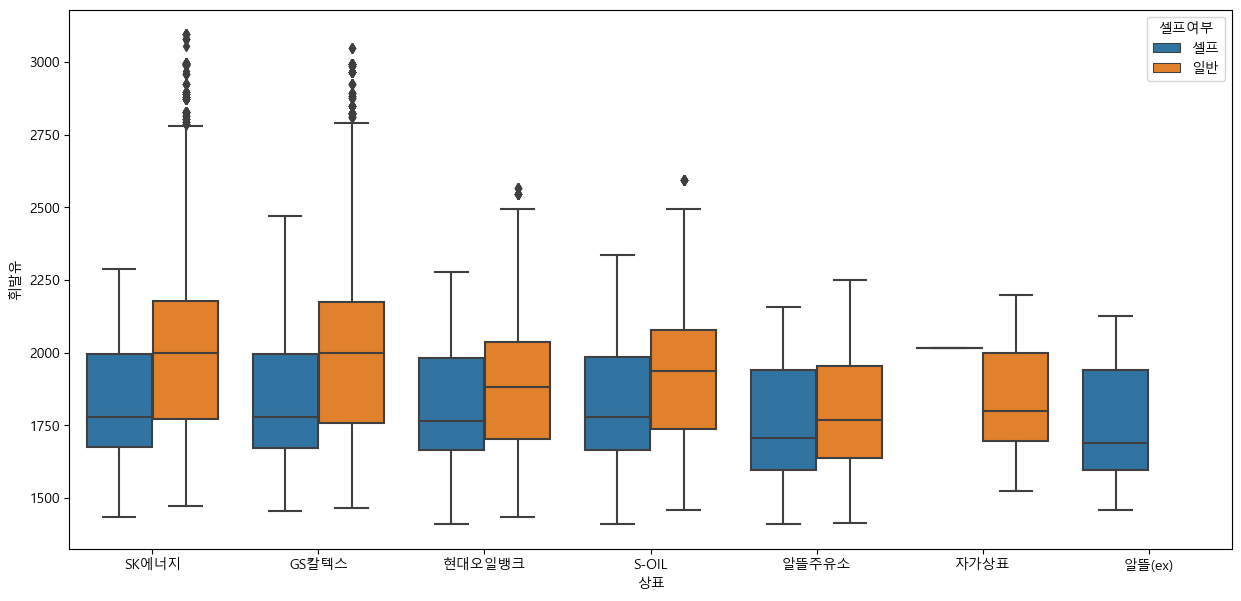

In [73]:
plt.figure(figsize = (15, 7))
sns.boxplot(data=df.query('휘발유 != 0'), x='상표', y='휘발유', hue='셀프여부') # hue: 범주형 -> 범주값에 따라 다른 색으로 구분해서 그린다. (따로 그린다.)
plt.show()

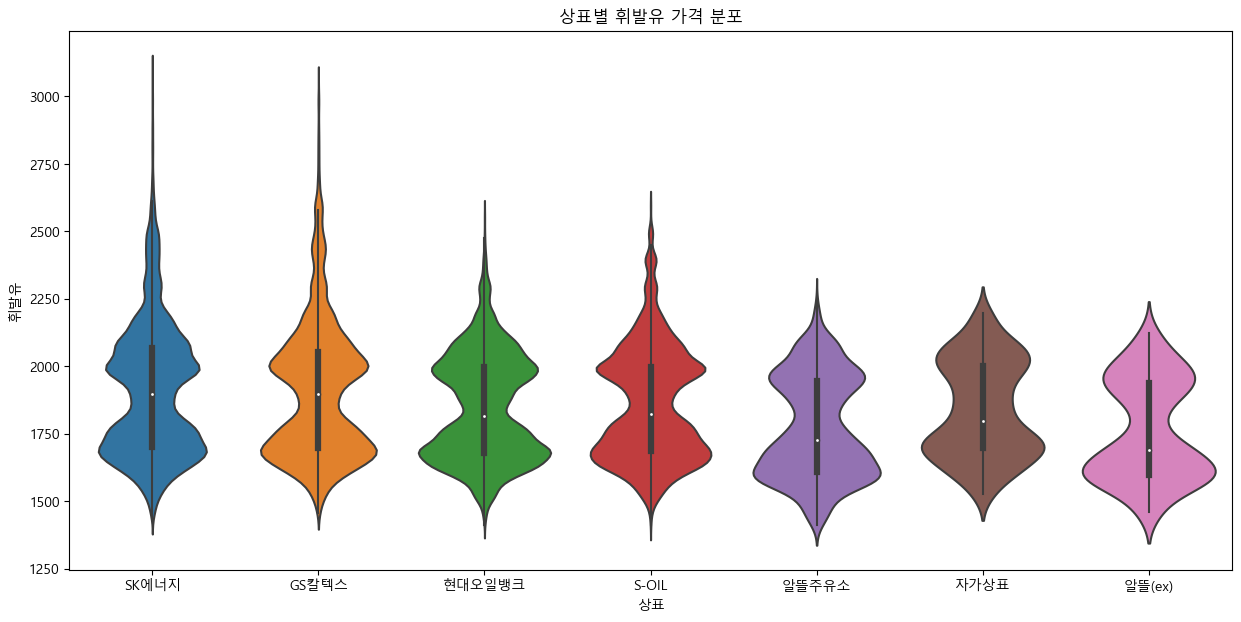

In [74]:
plt.figure(figsize = (15, 7))
sns.violinplot(data=df.query('휘발유!=0'), x='상표', y='휘발유')  #  y: 연속형 -> 4분위, 정상범위 등을 계산, x: 범주형-나누는 대상
plt.title('상표별 휘발유 가격 분포')
plt.show()

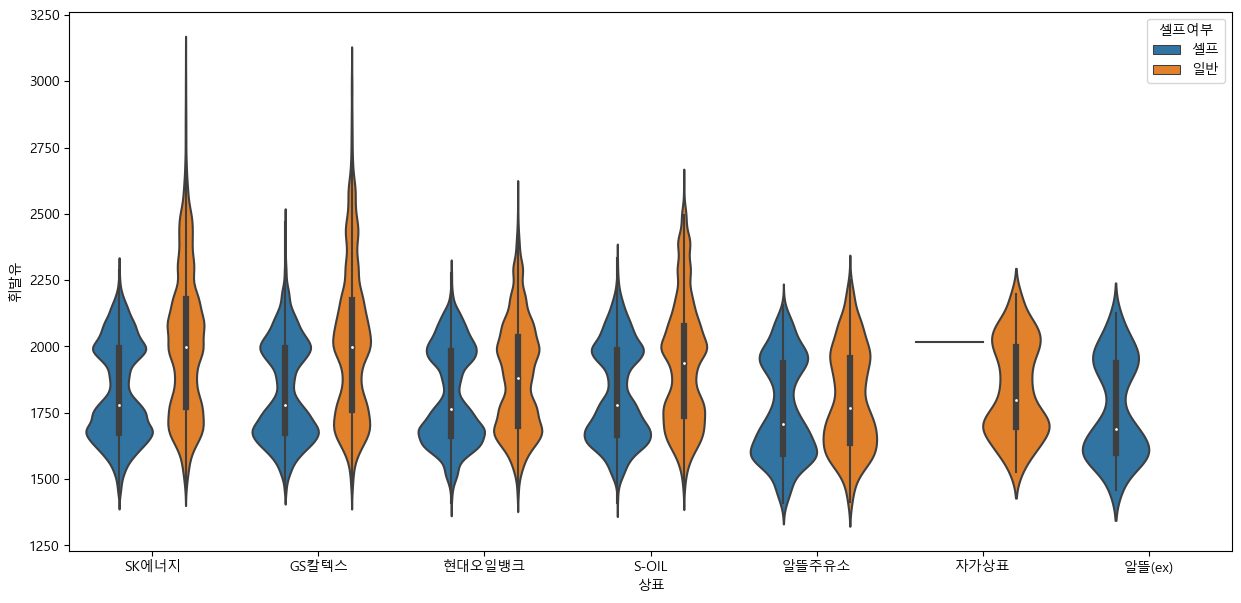

In [75]:
plt.figure(figsize = (15, 7))
sns.violinplot(data=df.query('휘발유 != 0'), x='상표', y='휘발유', hue='셀프여부') # hue: 범주형 -> 범주값에 따라 다른 색으로 구분해서 그린다. (따로 그린다.)
plt.show()

------

- **구별 휘발유 가격의 평균**

In [78]:
result = df.query('휘발유!=0').groupby('구')['휘발유'].mean().sort_values(ascending=False)  # chaining 기법
result

구
용산구     2220.150152
중구      2164.813156
종로구     2130.644512
강남구     2027.348234
성동구     1927.180711
강동구     1911.814372
서초구     1908.632928
마포구     1883.471491
영등포구    1867.273173
구로구     1866.193142
관악구     1855.413983
동작구     1850.987097
송파구     1847.526087
노원구     1846.423689
강서구     1829.916928
동대문구    1826.440487
은평구     1823.821755
광진구     1820.783333
서대문구    1820.522224
성북구     1807.024316
중랑구     1805.788631
금천구     1804.142998
양천구     1803.676968
도봉구     1801.099349
강북구     1787.720341
Name: 휘발유, dtype: float64

------

- **평균 가격이 가장 높은 구의 상표별 휘발유 평균가격**

In [84]:
# boolean indexing - df[bool 연산-행] [컬럼명], df.loc[bool연산-행, 컬럼]

df.loc[df['구']==result.index[0]].groupby('상표')['휘발유'].mean()

상표
GS칼텍스     2386.086653
SK에너지     2245.048402
현대오일뱅크    2013.058905
Name: 휘발유, dtype: float64

In [85]:
df[df['구'] == result.idxmax()].groupby('상표')['휘발유'].mean()

상표
GS칼텍스     2386.086653
SK에너지     2245.048402
현대오일뱅크    2013.058905
Name: 휘발유, dtype: float64

------

- **월 평균 휘발유 가격**

In [89]:
월별_평균_휘발유_가격 = df.query('휘발유!=0').groupby('월')['휘발유'].mean()
월별_평균_휘발유_가격

월
1     1705.212460
2     1782.078505
3     2011.746876
4     2036.850250
5     2027.546073
6     2151.490272
7     2082.968590
8     1858.737602
9     1799.950232
10    1737.664435
11    1719.719665
12    1648.983053
Name: 휘발유, dtype: float64

------

- **월 평균 휘발유 가격 변화추이를 시각화**

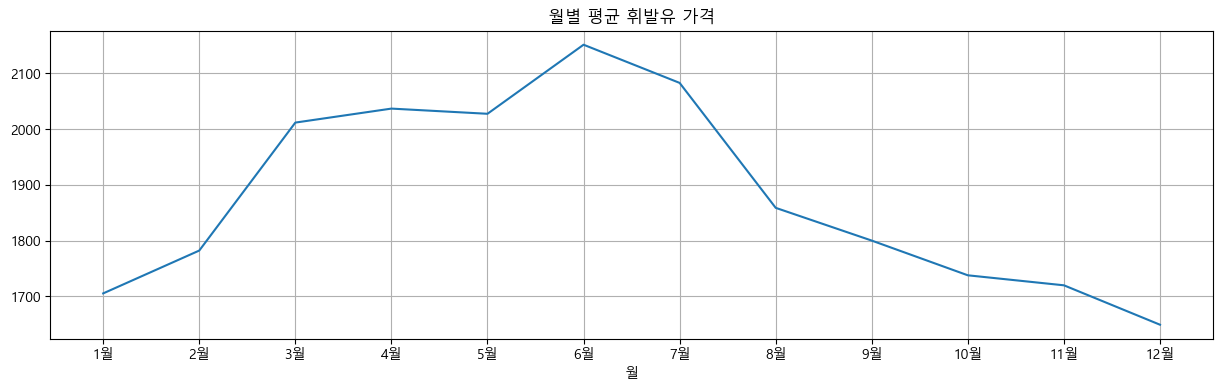

In [95]:
월별_평균_휘발유_가격.plot(figsize=(15,4))
plt.title('월별 평균 휘발유 가격')
plt.xticks(range(1, 13), labels=[str(i)+'월' for i in range(1, 13)])
plt.grid(True)
plt.show()

------

- **각 구의 월별 평균 휘발유 가격**

In [98]:
구_월별_휘발유_평균가격 = np.round(df.pivot_table(index='월', columns='구', values='휘발유', aggfunc='mean'), 2)
구_월별_휘발유_평균가격

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
월,,,,,,,,,,,,,,,,,,,,,
1,1845.04,1732.29,1599.38,1657.35,1693.37,1643.83,1679.96,1643.85,1671.23,1613.96,...,1734.80,1632.61,1678.79,1633.02,1700.58,2046.39,1641.13,1924.91,2002.51,1624.84
2,1914.71,1797.40,1692.99,1744.52,1767.61,1733.17,1754.28,1718.96,1749.08,1702.60,...,1810.23,1715.84,1741.30,1711.94,1777.38,2119.34,1714.38,1995.06,2073.92,1714.38
3,2109.48,2020.05,1954.91,1968.37,1992.62,1965.27,2005.56,1947.87,1981.65,1964.16,...,2042.38,1961.17,1967.73,1943.26,2006.05,2266.33,1956.02,2193.61,2235.39,1948.59
4,2138.08,2075.56,1968.94,1994.08,2012.60,1975.05,2035.07,1948.89,2007.24,1974.97,...,2078.88,1978.13,2001.12,1962.07,2035.38,2267.59,1984.84,2230.10,2182.42,1977.86
5,2137.11,2055.98,1946.04,1989.01,1986.18,1959.89,2015.15,1941.69,2007.70,1958.48,...,2060.63,1957.71,1991.34,1954.15,2027.46,2387.13,1966.93,2252.17,2325.95,1954.36
6,2273.51,2174.08,2077.16,2118.27,2117.29,2096.48,2132.77,2081.94,2117.35,2086.65,...,2190.38,2088.65,2115.77,2084.83,2143.57,2471.29,2087.96,2350.65,2434.63,2076.31
7,2223.27,2125.90,1976.94,2037.92,2061.85,2018.15,2078.69,1998.35,2070.65,2002.05,...,2139.18,2012.29,2056.82,2004.27,2056.82,2381.95,2028.06,2327.39,2331.20,2022.89
8,2013.87,1910.25,1756.04,1814.66,1829.48,1785.53,1854.95,1788.94,1829.00,1774.89,...,1915.36,1772.32,1826.30,1773.62,1836.01,2165.80,1804.53,2158.13,2137.11,1773.06
9,1965.88,1829.52,1692.45,1744.27,1778.40,1734.72,1786.94,1731.79,1767.56,1712.80,...,1848.38,1709.31,1758.67,1715.98,1767.26,2130.39,1738.69,2110.46,2100.51,1717.47


------

- **각 구의 월별 평균가격의 변화추이 시각화**

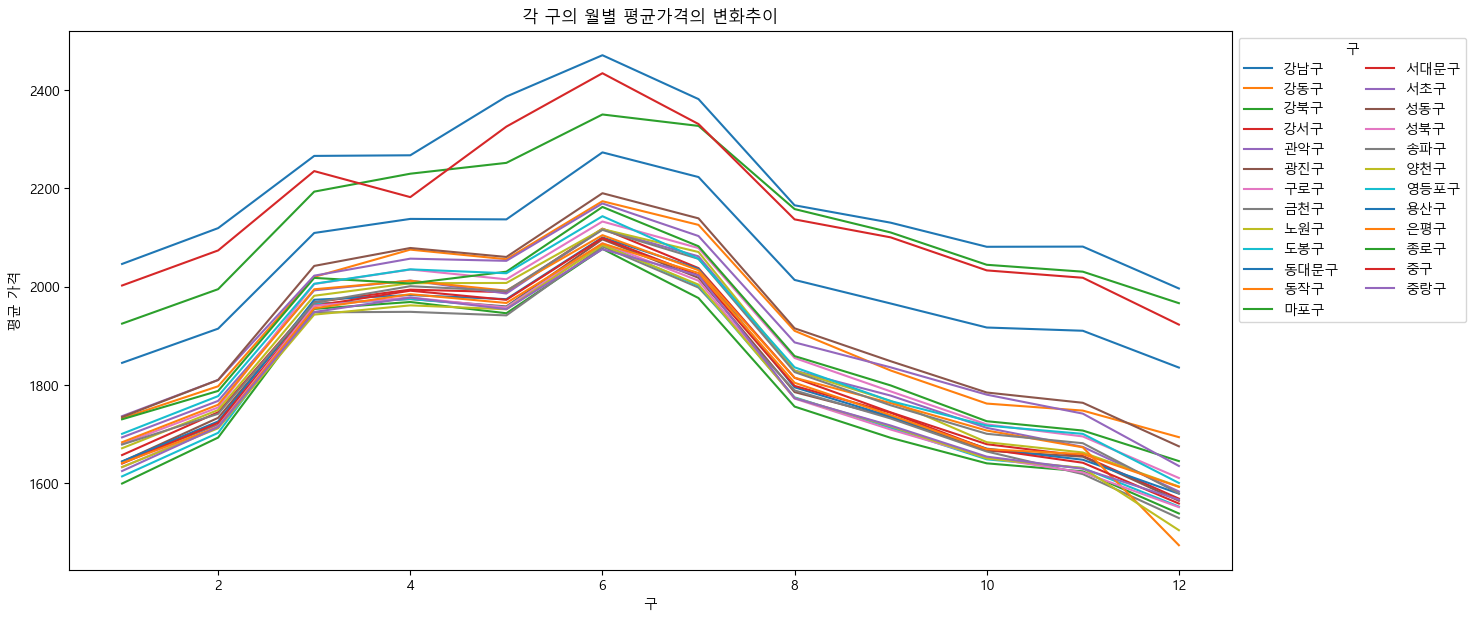

In [100]:
구_월별_휘발유_평균가격.plot(figsize=(15, 7), title='각 구의 월별 평균가격의 변화추이', xlabel = '구', ylabel='평균 가격' )
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='구', ncol=2)
plt.show()

------

- **가장 휘발유가격이 비싼 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)**

In [125]:
sorted_value = df.query('휘발유!=0').groupby('상호')['휘발유'].max().sort_values(ascending=False)
sorted_value[:5]

상호
서남주유소     3096
서계주유소     3050
필동주유소     2789
동자동주유소    2690
한석주유소     2681
Name: 휘발유, dtype: int64

In [126]:
# df.loc[df['휘발유']].sort_values(ascending=False).head(5).index]
# 상호 주소 나눔. -> 주소: 상호가 같은 주유소가 있을 경우를 대비
df.groupby(['상호', '주소'])['휘발유'].max().sort_values(ascending=False).head(5)

상호      주소                     
서남주유소   서울 중구 통일로 30               3096
서계주유소   서울 용산구  청파로 367 (청파동)      3050
필동주유소   서울 중구 퇴계로 196 (필동2가)       2789
동자동주유소  서울 용산구 한강대로104길 6 (동자동)    2690
한석주유소   서울 용산구 이촌로 164             2681
Name: 휘발유, dtype: int64

In [132]:
비싼주유소 =df.query('휘발유!=0').groupby(['상호', '주소'])['휘발유'].max().sort_values(ascending=False).head(5)
비싼주유소

상호      주소                     
서남주유소   서울 중구 통일로 30               3096
서계주유소   서울 용산구  청파로 367 (청파동)      3050
필동주유소   서울 중구 퇴계로 196 (필동2가)       2789
동자동주유소  서울 용산구 한강대로104길 6 (동자동)    2690
한석주유소   서울 용산구 이촌로 164             2681
Name: 휘발유, dtype: int64

------

- **가장 휘발유가격이 저렴한 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)**

In [110]:
sorted_value[-5:]

상호
오션네트웍스(주) 서울식물원지점    1940
정다운셀프주유소             1759
(주)명보에너지             1755
송파알찬주유소              1690
(주)동원석유              1654
Name: 휘발유, dtype: int64

In [113]:
저렴한주유소 =df.query('휘발유!=0').groupby(['상호', '주소'])['휘발유'].max().sort_values().head(5)
저렴한주유소

상호                 주소                       
(주)동원석유            경기도 부천시 원미구  부흥로 182 (중동)    1654
송파알찬주유소            서울 송파구 백제고분로 229 (삼전동)       1690
(주)명보에너지           경기도 시흥시  수인로 2186 (목감동)      1755
정다운셀프주유소           서울 도봉구 도봉로 635               1759
오션네트웍스(주) 서울식물원지점  서울 강서구 양천로 300               1940
Name: 휘발유, dtype: int64

In [116]:
# index나 컬럼명이 여러개 => Multi-Index
# 특정 level의 index를 조회 (level -> 밖에서 안쪽으로 0~N 1씩 증가, (음수 index도 있다.))
저렴한주유소.index

MultiIndex([(          '(주)동원석유', '경기도 부천시 원미구  부흥로 182 (중동)'),
            (          '송파알찬주유소',    '서울 송파구 백제고분로 229 (삼전동)'),
            (         '(주)명보에너지',   '경기도 시흥시  수인로 2186 (목감동)'),
            (         '정다운셀프주유소',            '서울 도봉구 도봉로 635'),
            ('오션네트웍스(주) 서울식물원지점',            '서울 강서구 양천로 300')],
           names=['상호', '주소'])

In [117]:
저렴한주유소.index.get_level_values(0)  # level 0 index값들을 조회

Index(['(주)동원석유', '송파알찬주유소', '(주)명보에너지', '정다운셀프주유소', '오션네트웍스(주) 서울식물원지점'], dtype='object', name='상호')

In [118]:
저렴한주유소.index.get_level_values(-1) # 맨 안쪽 index

Index(['경기도 부천시 원미구  부흥로 182 (중동)', '서울 송파구 백제고분로 229 (삼전동)',
       '경기도 시흥시  수인로 2186 (목감동)', '서울 도봉구 도봉로 635', '서울 강서구 양천로 300'],
      dtype='object', name='주소')

------

- **휘발유 비싼 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거-drop_duplicates)** ==> 비싼 주유소 조회결과에 추가정보를 확인

In [112]:
df.sort_values(['휘발유'], ascending=False).drop_duplicates(['상호', '지역', '주소']).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-22,SK에너지,일반,3496,3096,3223,2719,중구,6,22,수
72549,A0000925,서울 용산구,서계주유소,서울 용산구 청파로 367 (청파동),2022-06-28,GS칼텍스,일반,3450,3050,3025,0,용산구,6,28,화
80019,A0009047,서울 중구,필동주유소,서울 중구 퇴계로 196 (필동2가),2022-06-23,GS칼텍스,일반,2999,2789,2959,2349,중구,6,23,목
72360,A0000223,서울 용산구,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2022-06-20,SK에너지,일반,2990,2690,2680,1890,용산구,6,20,월
73266,A0000221,서울 용산구,한석주유소,서울 용산구 이촌로 164,2022-06-21,SK에너지,일반,2964,2681,2893,0,용산구,6,21,화


In [134]:
df.loc[df['상호'].isin(비싼주유소.index.get_level_values(0)) & df['주소'].isin(비싼주유소.index.get_level_values(1)), ['상호', '지역', '주소']].drop_duplicates()

,상호,지역,주소
72190,동자동주유소,서울 용산구,서울 용산구 한강대로104길 6 (동자동)
72371,서계주유소,서울 용산구,서울 용산구 청파로 367 (청파동)
73095,한석주유소,서울 용산구,서울 용산구 이촌로 164
78766,서남주유소,서울 중구,서울 중구 통일로 30
79846,필동주유소,서울 중구,서울 중구 퇴계로 196 (필동2가)


------

- **휘발유 저렴한 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거)**

In [138]:
df.query('휘발유!=0').sort_values(['휘발유']).drop_duplicates(['상호', '지역', '주소']).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
99498,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-12-27,알뜰주유소,셀프,0,1410,1660,0,강서구,12,27,화
97839,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-24,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,24,토
148433,A0001005,서울 양천구,현대주유소,서울 양천구 남부순환로 372 (신월동),2022-12-26,S-OIL,셀프,0,1410,1660,0,양천구,12,26,월
95298,A0004657,서울 강서구,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2022-12-22,알뜰주유소,일반,0,1415,1665,0,강서구,12,22,목
96218,A0000582,서울 강서구,목화주유소,서울 강서구 국회대로 251 (화곡동),2022-12-22,알뜰주유소,셀프,0,1430,1670,0,강서구,12,22,목


In [140]:
df.query("상호 in @저렴한주유소.index.get_level_values(0) and 주소 in @저렴한주유소.index.get_level_values(1)")[['상호', '지역', '주소']].drop_duplicates()

,상호,지역,주소
25556,(주)명보에너지,서울 금천구,경기도 시흥시 수인로 2186 (목감동)
32304,정다운셀프주유소,서울 도봉구,서울 도봉구 도봉로 635
43575,(주)동원석유,서울 서초구,경기도 부천시 원미구 부흥로 182 (중동)
59953,송파알찬주유소,서울 송파구,서울 송파구 백제고분로 229 (삼전동)
97148,오션네트웍스(주) 서울식물원지점,서울 강서구,서울 강서구 양천로 300


In [141]:
df.query("상호 in @저렴한주유소.index.get_level_values(0) and 주소 in @저렴한주유소.index.get_level_values(1)").drop_duplicates(['상호', '지역', '주소'])

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
25556,A0001162,서울 금천구,(주)명보에너지,경기도 시흥시 수인로 2186 (목감동),2022-01-01,알뜰주유소,일반,0,1619,1439,0,금천구,1,1,토
32304,A0009537,서울 도봉구,정다운셀프주유소,서울 도봉구 도봉로 635,2022-01-01,SK에너지,셀프,0,1570,1419,0,도봉구,1,1,토
43575,A0002534,서울 서초구,(주)동원석유,경기도 부천시 원미구 부흥로 182 (중동),2022-01-01,S-OIL,셀프,0,1654,1494,0,서초구,1,1,토
59953,A0010018,서울 송파구,송파알찬주유소,서울 송파구 백제고분로 229 (삼전동),2022-01-01,S-OIL,셀프,0,1690,1520,0,송파구,1,1,토
97148,A0033659,서울 강서구,오션네트웍스(주) 서울식물원지점,서울 강서구 양천로 300,2022-08-03,SK에너지,셀프,1987,1940,1990,0,강서구,8,3,수


------

- **고급 휘발유를 가장 많이 파는 구 조회**

In [144]:
df.query('고급휘발유!=0').groupby('구')['고급휘발유'].count().sort_values()[-1:]

구
강남구    10784
Name: 고급휘발유, dtype: int64

In [154]:
df.query('고급휘발유!=0')[['구', '상호', '주소']].drop_duplicates().groupby('구')['상호'].count().sort_values(ascending=False) # 동일한 주유소가 같이 count가 됨

구
강남구     30
서초구     26
송파구     18
성북구     15
강서구     13
용산구     13
영등포구    13
성동구     11
종로구      9
양천구      9
은평구      8
중구       8
광진구      7
노원구      7
서대문구     7
동작구      6
강동구      6
도봉구      6
마포구      5
동대문구     5
금천구      5
구로구      5
관악구      5
강북구      5
중랑구      4
Name: 상호, dtype: int64

###############################################################################
- **주유소 가격 데이터를 이용해서 알고 싶은 정보들을 추가 분석해 보세요.**  

###############################################################################


In [41]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,토
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,일
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,월
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,화
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,수


------

- **기간 컬럼을 datetime 타입으로 변경**

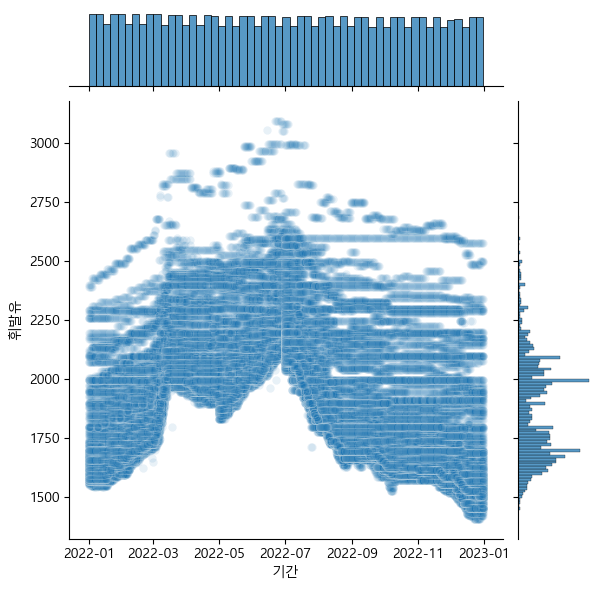

In [42]:
# 2022년 한해 기간별 휘발유 가격 시각화, 0은 제외

import seaborn as sns
sns.jointplot(data = df[df['휘발유']!=0], x = '기간', y = '휘발유', alpha=0.1)
plt.show()

------

- **기간 컬럼을 datetime 타입으로 변경**

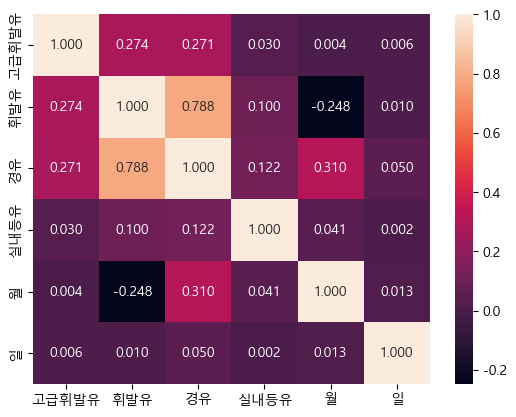

In [43]:
# 전체 데이터 간의 연관성 체크
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.3f')
plt.show()

# 경유와 휘발유 가격의 값이 0.788 유사도를 보여주었다

------

- **기간 컬럼을 datetime 타입으로 변경**

In [155]:
# 각 기름 월별 평균 가격 변화 추이

d1 = pd.DataFrame(df.query('휘발유!=0').groupby('월')['휘발유'].mean())
d2 = pd.DataFrame(df.query('경유!=0').groupby('월')['경유'].mean())
d3 = pd.DataFrame(df.query('고급휘발유!=0').groupby('월')['고급휘발유'].mean())
d4 = pd.DataFrame(df.query('실내등유!=0').groupby('월')['실내등유'].mean())
df2 = d1.join([d2, d3, d4])
df2

,휘발유,경유,고급휘발유,실내등유
월,,,,
1,1705.212460,1535.697111,1955.393159,1255.341176
2,1782.078505,1614.185887,2021.161310,1305.364725
3,2011.746876,1907.905467,2229.014608,1464.008966
4,2036.850250,1972.807300,2261.010463,1547.057320
5,2027.546073,2018.488787,2255.064958,1576.408495
6,2151.490272,2151.390980,2376.146313,1673.651980
7,2082.968590,2135.773742,2331.242912,1750.433668
8,1858.737602,1945.229803,2148.074905,1718.531119
9,1799.950232,1920.224461,2092.897019,1722.190097


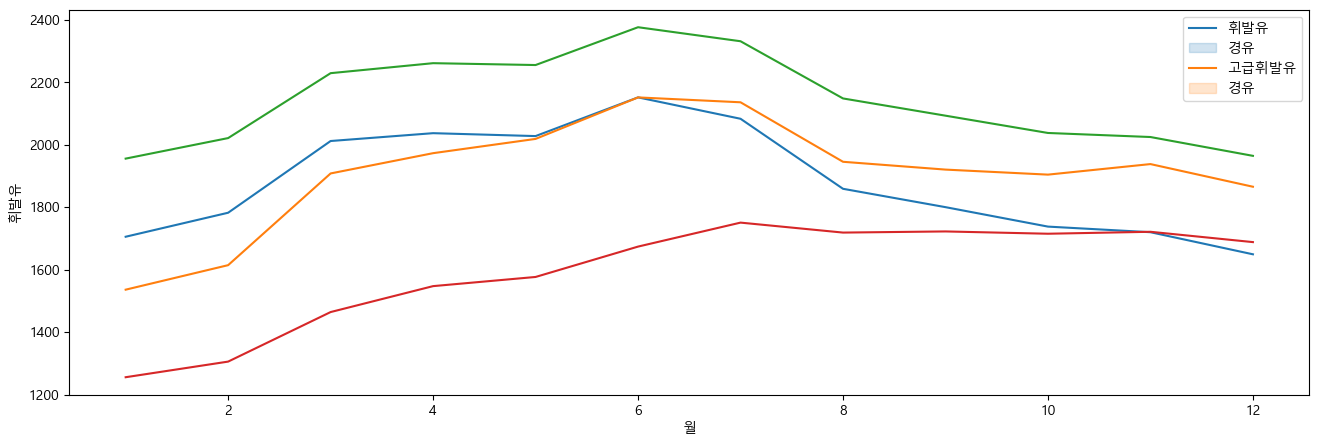

In [156]:
plt.figure(figsize=(16, 5))
sns.lineplot(data=df2, y='휘발유', x=df2.index)
sns.lineplot(data=df2, y='경유', x=df2.index)
sns.lineplot(data=df2, y='고급휘발유', x=df2.index)
sns.lineplot(data=df2, y='실내등유', x=df2.index)
plt.legend(['휘발유', '경유', '고급휘발유', '경유'])
plt.show()